### About the Dataset

**Car Price Prediction Dataset**

This dataset contains 10,000 entries, created for the purpose of predicting car prices. Each row represents a car and its features, including the price. The dataset includes various factors such as the brand, model, engine size, mileage, and more, all of which influence the car’s price.

#### **Columns Descriptions:**
- **Brand**: The brand of the car (e.g., Toyota, BMW, Ford).
- **Model**: The specific model of the car (e.g., Corolla, Focus, X5).
- **Year**: The production year of the car. Newer years typically correlate with higher prices.
- **Engine_Size**: The engine size in liters. Larger engines tend to result in higher prices.
- **Fuel_Type**: The type of fuel used by the car (Petrol, Diesel, Hybrid, Electric).
- **Transmission**: The transmission type (Manual, Automatic, Semi-Automatic).
- **Mileage**: The total distance the car has traveled, measured in kilometers. Lower mileage often indicates a higher price.
- **Doors**: The number of doors in the car, commonly 2, 3, 4, or 5.
- **Owner_Count**: The number of previous owners. Fewer owners generally correlate with a higher price.
- **Price**: The estimated selling price of the car, calculated based on various factors like production year, engine size, mileage, etc.


### Project Goal

The objective of this project is to predict the dependent variable, **Price**, as accurately as possible using the most effective machine learning methods. To achieve this, the process includes data preprocessing, data visualization, exploratory data analysis, statistical exploration, and data cleaning.


In [109]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [110]:
# Load the dataset
df = pd.read_csv("car_price_dataset.csv").copy()

In [111]:
# Display the first 5 rows of the dataset
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [112]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [113]:
# Generate descriptive statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,10000.0,2011.54370,6.897699,2000.0,2006.00,2012.0,2017.0,2023.0
Engine_Size,10000.0,3.00056,1.149324,1.0,2.00,3.0,4.0,5.0
Mileage,10000.0,149239.11180,86322.348957,25.0,74649.25,149587.0,223577.5,299947.0
Doors,10000.0,3.49710,1.110097,2.0,3.00,3.0,4.0,5.0
Owner_Count,10000.0,2.99110,1.422682,1.0,2.00,3.0,4.0,5.0
Price,10000.0,8852.96440,3112.596810,2000.0,6646.00,8858.5,11086.5,18301.0


In [6]:
# Check the data types of each column
df.dtypes

Brand            object
Model            object
Year              int64
Engine_Size     float64
Fuel_Type        object
Transmission     object
Mileage           int64
Doors             int64
Owner_Count       int64
Price             int64
dtype: object

In [7]:
# Check for missing values in the dataset
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [8]:
# Check for NaN values in the dataset
df.isna().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

### Data Visualization
Visualizing the data helps us understand the distribution of variables and identify patterns or anomalies.

In [9]:
# Import visualization libraries
import matplotlib.pyplot as plt

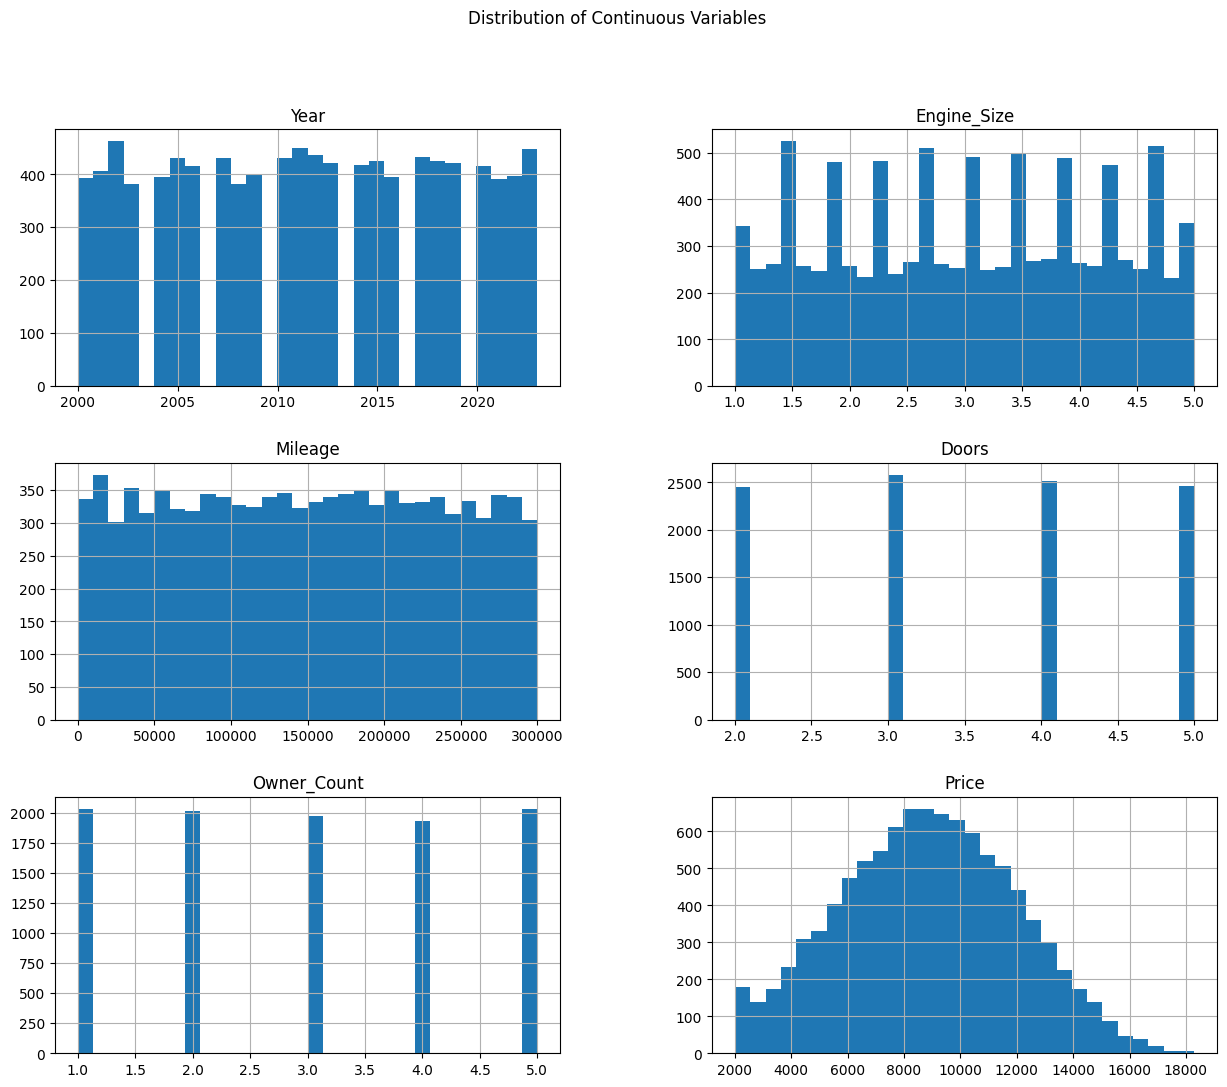

In [10]:
# Plot histograms for continuous variables
df.hist(figsize=(15, 12), bins=30)
plt.suptitle("Distribution of Continuous Variables");

In [11]:
# Check the number of unique values in categorical columns
for col in df.select_dtypes(include=["object"]).columns:
    print(f"{col}: {df[col].nunique()} unique values")

Brand: 10 unique values
Model: 30 unique values
Fuel_Type: 4 unique values
Transmission: 3 unique values


In [12]:
import seaborn as sns

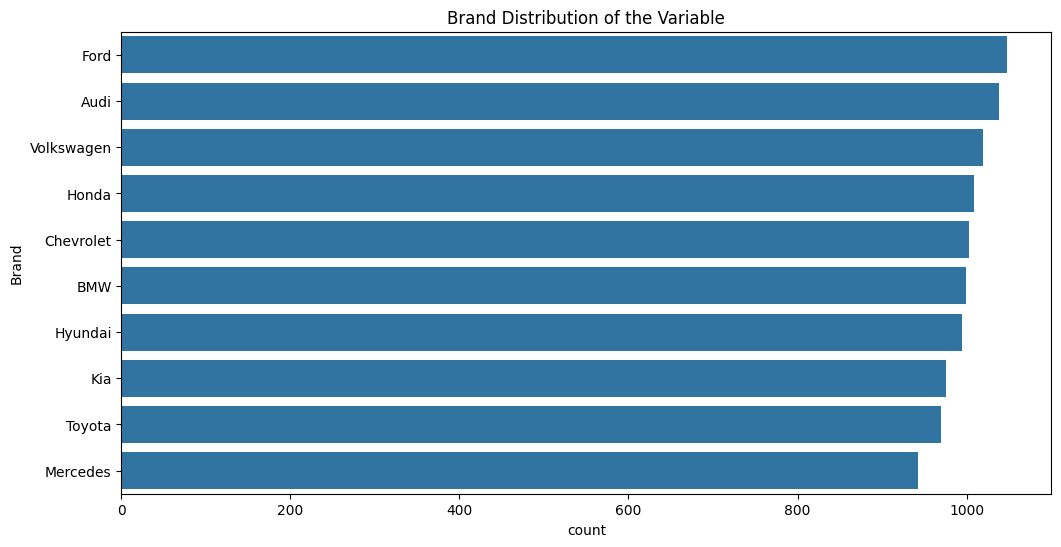

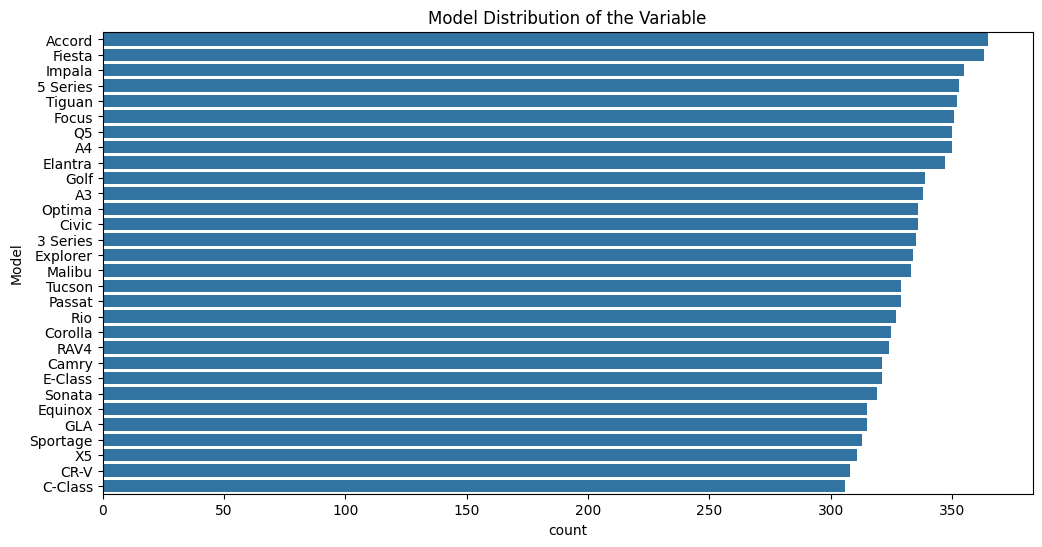

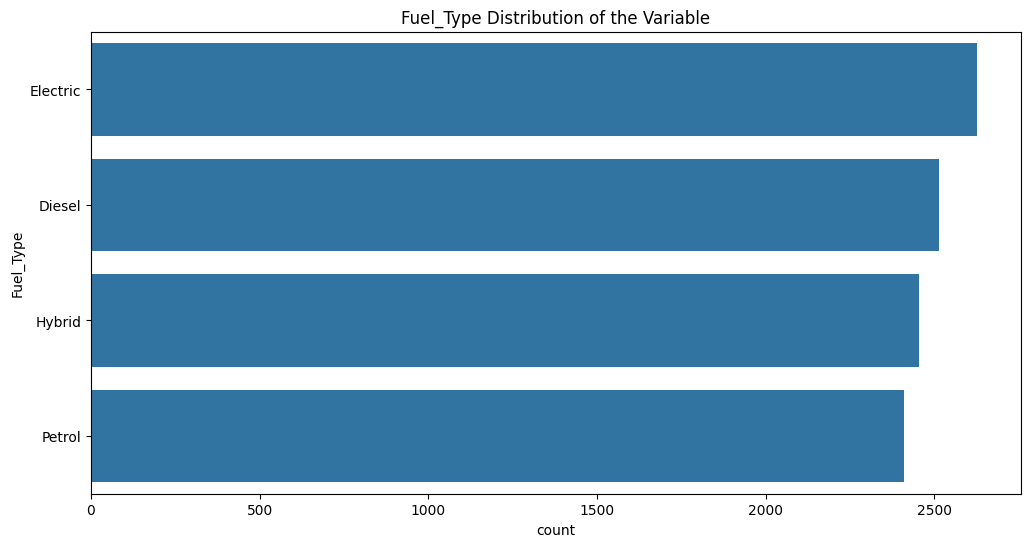

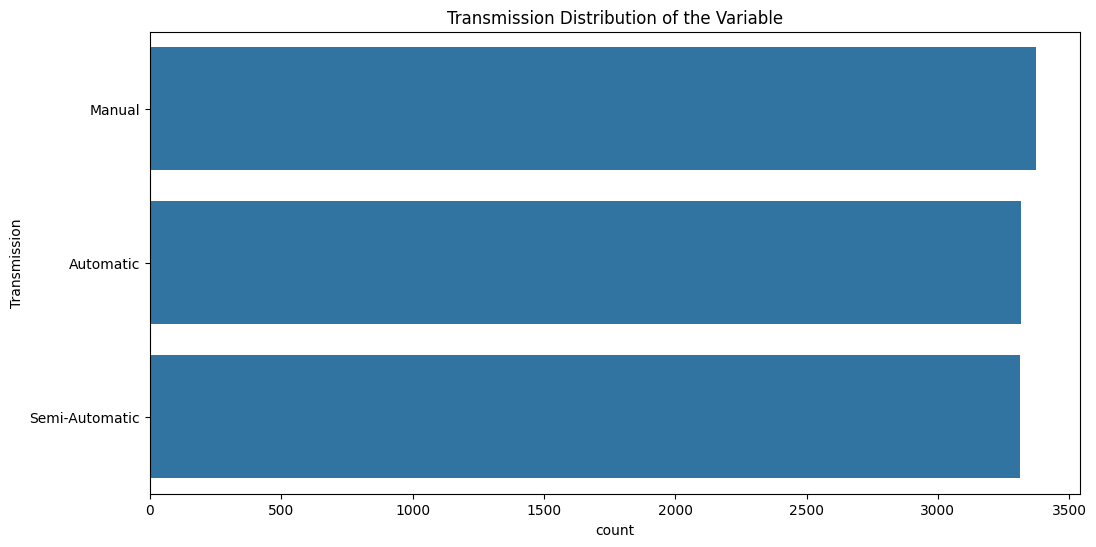

In [13]:
# Plot count plots for categorical variables
for col in df.select_dtypes(include=["object"]).columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"{col} Distribution of the Variable")
    plt.show()

C:\Users\ilker\AppData\Local\Temp\ipykernel_13252\2806859007.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


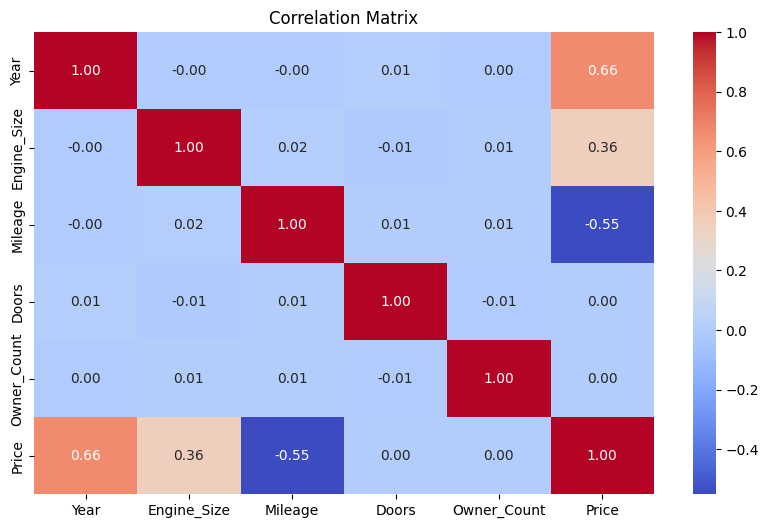

In [14]:
# Plot a correlation matrix to understand relationships between numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

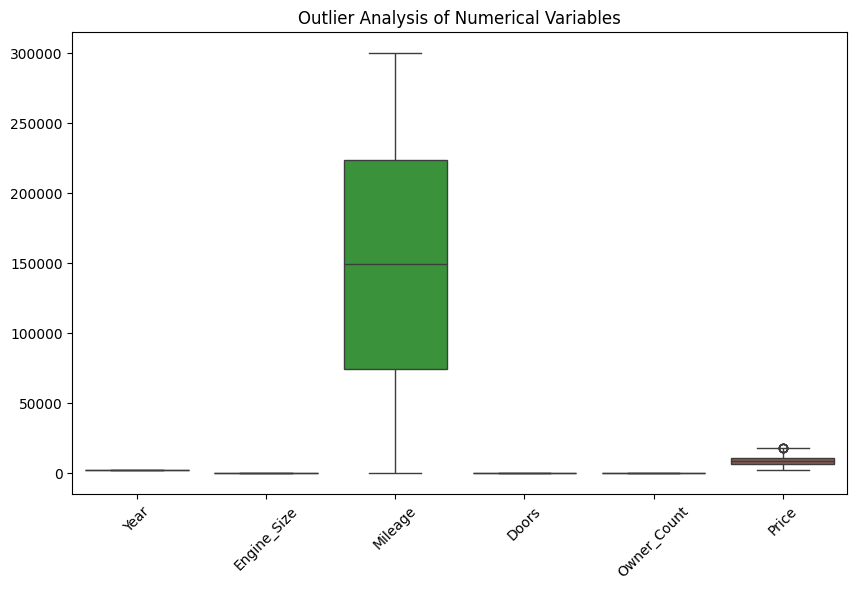

In [15]:
# Perform outlier analysis using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=["number"]))
plt.xticks(rotation=45)
plt.title("Outlier Analysis of Numerical Variables")
plt.show()


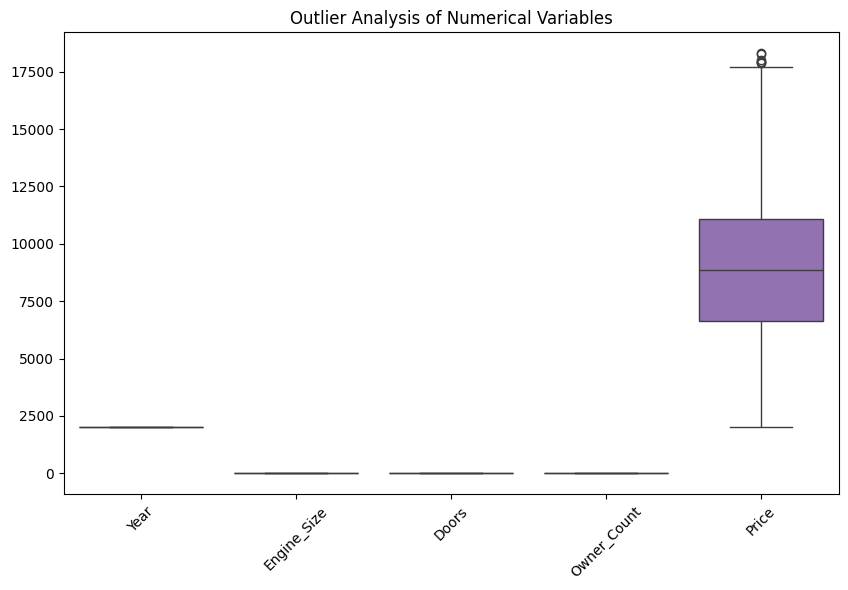

In [16]:
# Drop specific columns and re-plot to focus on certain variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=["Mileage"]).select_dtypes(include=["number"]))
plt.xticks(rotation=45)
plt.title("Outlier Analysis of Numerical Variables")
plt.show()

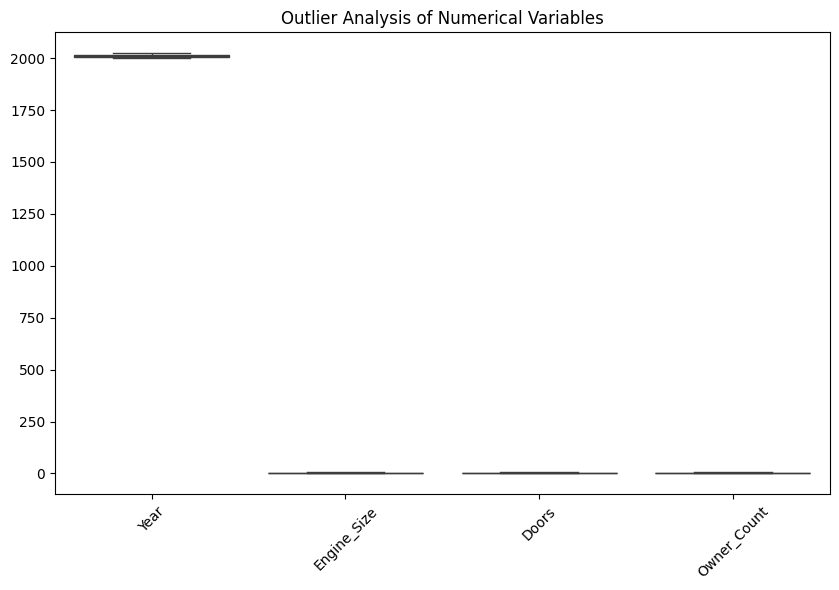

In [17]:
# Drop specific columns and re-plot to focus on smaller variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=["Mileage","Price"]).select_dtypes(include=["number"]))
plt.xticks(rotation=45)
plt.title("Outlier Analysis of Numerical Variables")
plt.show()

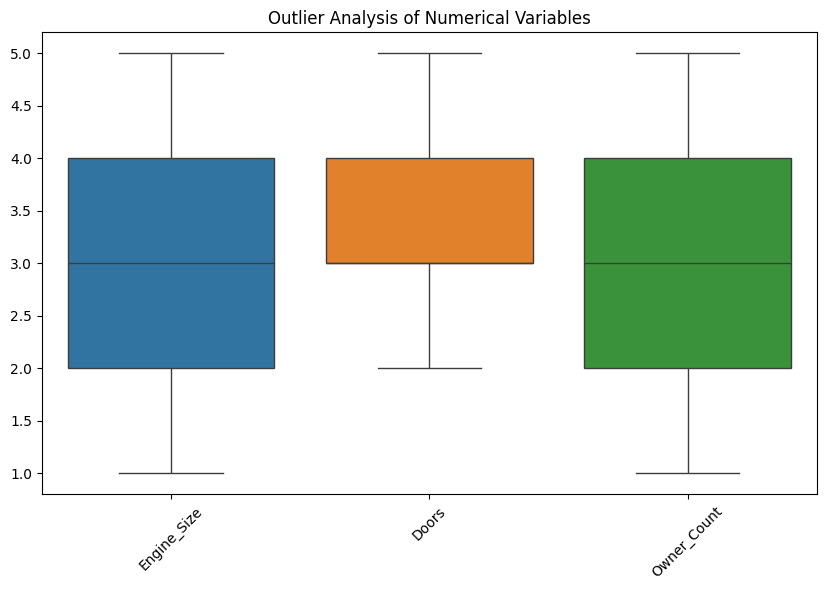

In [18]:
# Drop specific columns and re-plot to focus on smaller variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=["Mileage","Price","Year"]).select_dtypes(include=["number"]))
plt.xticks(rotation=45)
plt.title("Outlier Analysis of Numerical Variables")
plt.show()

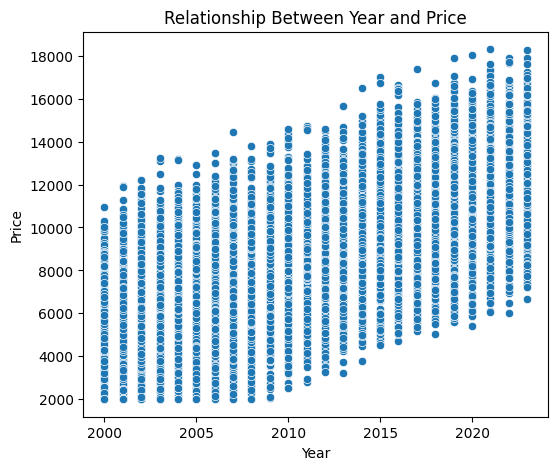

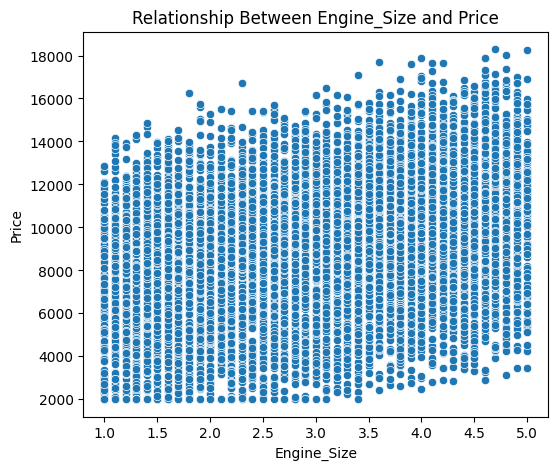

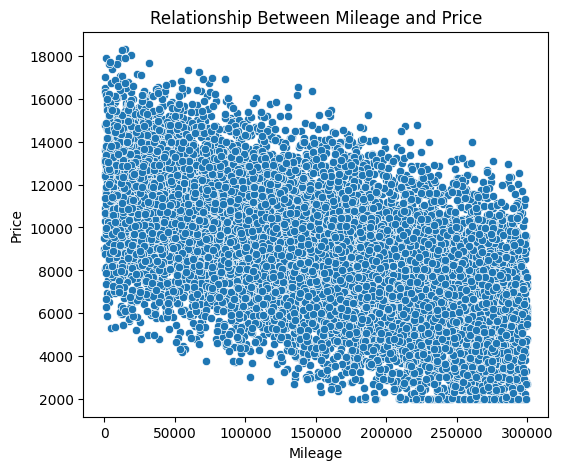

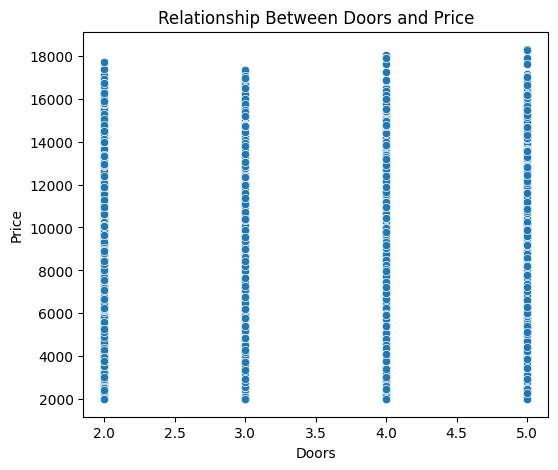

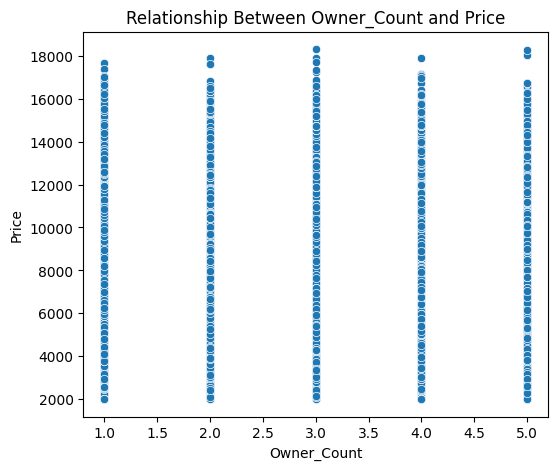

In [19]:
# Scatter plots to analyze relationships between numerical variables and price
for col in df.select_dtypes(include=["number"]).columns:
    if col != "Price":
        plt.figure(figsize=(6, 5))
        sns.scatterplot(x=df[col], y=df["Price"])
        plt.title(f"Relationship Between {col} and Price")
        plt.show()

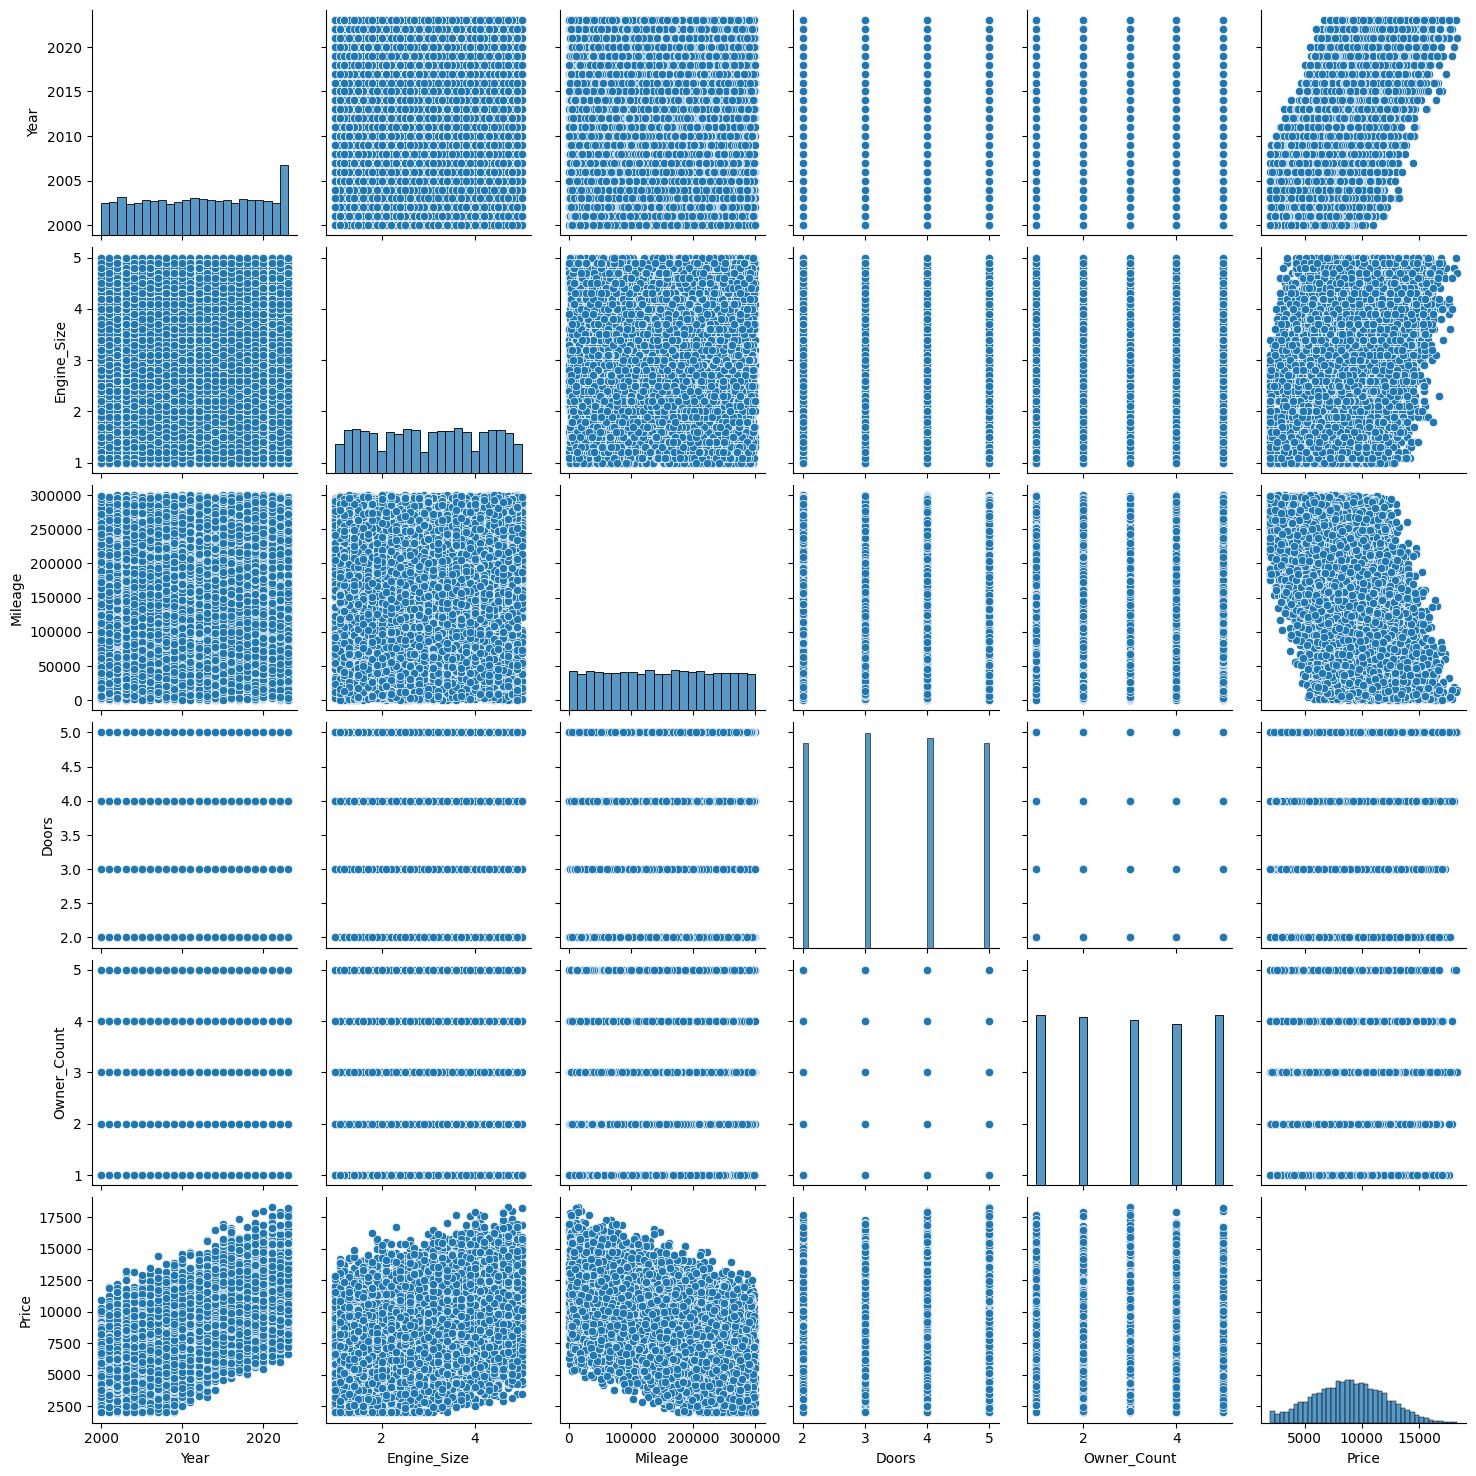

In [20]:
# Pairplot to visualize pairwise relationships in the dataset
sns.pairplot(df)

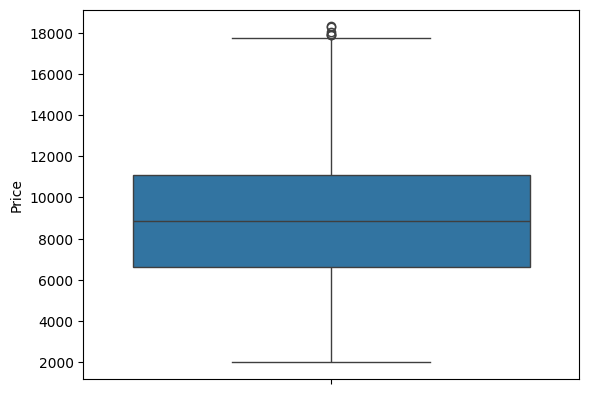

In [21]:
# Boxplot for the target variable (Price)
sns.boxplot(data=df["Price"]);

### Outlier Detection and Handling
Outliers can significantly affect the performance of machine learning models. We use the Interquartile Range (IQR) method to detect and handle outliers in the `Price` column.

In [22]:
# Calculate IQR for the Price column
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1

In [23]:
# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
# Filter out outliers
df = df[(df["Price"] >= lower_bound) & (df["Price"] <= upper_bound)]

<Axes: ylabel='Price'>

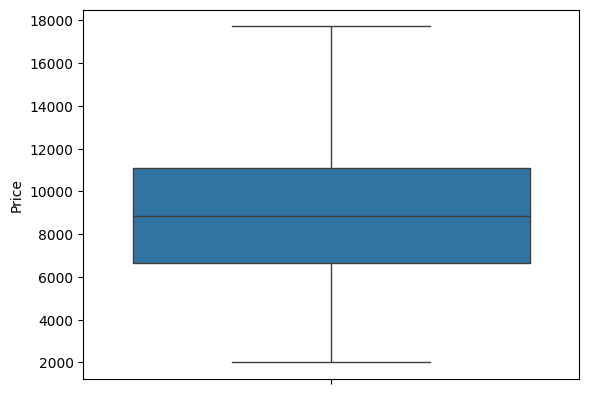

In [24]:
# Visualize the Price column after removing outliers
sns.boxplot(data=df["Price"])

### Statistical Analysis
We perform statistical tests to understand the relationships and distributions of the data.

In [25]:
# Calculate Pearson correlation between numerical variables and Price
from scipy.stats import pearsonr

num_cols = ['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count']
for col in num_cols:
    corr, _ = pearsonr(df[col], df['Price'])
    print(f'Pearson Correlation between {col} and Price: {corr:.2f}')

Pearson Correlation between Year and Price: 0.66
Pearson Correlation between Engine_Size and Price: 0.36
Pearson Correlation between Mileage and Price: -0.55
Pearson Correlation between Doors and Price: -0.00
Pearson Correlation between Owner_Count and Price: 0.00


In [26]:
# Perform Shapiro-Wilk test to check for normality in the Price column
from scipy.stats import shapiro

stat, p_value = shapiro(df['Price'])

print(f"Shapiro-Wilk Test Statistic: {stat:.3f}")
print(f"p-value: {p_value:.4f}")

if p_value > 0.05:
    print("The data follows a normal distribution (fail to reject H0).")
else:
    print("The data does not follow a normal distribution (reject H0).")

Shapiro-Wilk Test Statistic: 0.995
p-value: 0.0000
The data does not follow a normal distribution (reject H0).


C:\Users\ilker\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


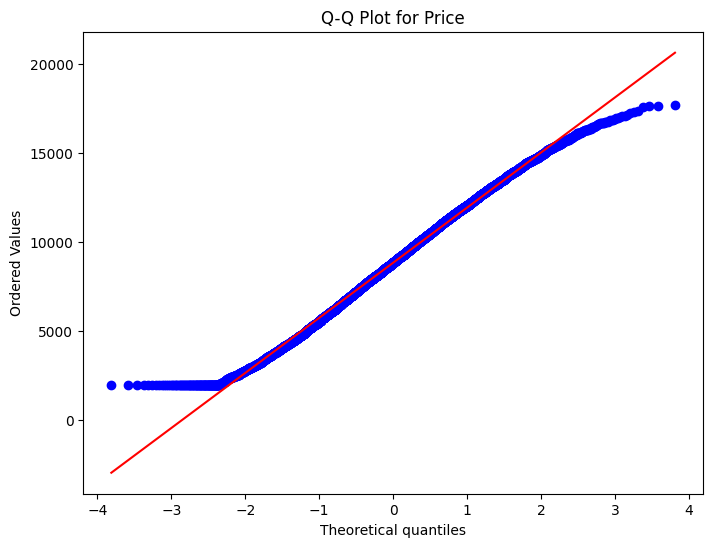

In [27]:
# Q-Q plot to visually assess normality
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(df['Price'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Price')
plt.show()

### Feature Engineering
We create new features to improve the predictive power of the model.

In [28]:
# Create a new feature 'Age' based on the production year
df['Age'] = 2025 - df['Year']

C:\Users\ilker\AppData\Local\Temp\ipykernel_13252\3061075236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = 2025 - df['Year']


In [29]:
# Create a new feature 'Mileage_per_Age'
df['Mileage_per_Age'] = df['Mileage'] / df['Age']

C:\Users\ilker\AppData\Local\Temp\ipykernel_13252\949637143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage_per_Age'] = df['Mileage'] / df['Age']


In [30]:
# Create a new feature 'Price_per_Engine_Size'
df['Price_per_Engine_Size'] = df['Price'] / df['Engine_Size']

C:\Users\ilker\AppData\Local\Temp\ipykernel_13252\295022766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price_per_Engine_Size'] = df['Price'] / df['Engine_Size']


In [31]:
# Create a new feature 'Price_per_Engine_Size'
df['Price_per_Age'] = df['Price'] / df['Age']

C:\Users\ilker\AppData\Local\Temp\ipykernel_13252\2432432526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price_per_Age'] = df['Price'] / df['Age']


In [32]:
# Create a new feature 'Price_per_Age'
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Age,Mileage_per_Age,Price_per_Engine_Size,Price_per_Age
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501,5,57988.800000,2024.047619,1700.200000
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092,13,412.000000,6046.000000,930.153846
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171,5,46288.000000,2659.761905,2234.200000
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780,2,80485.500000,5890.000000,5890.000000
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867,22,13028.090909,1102.692308,130.318182


In [33]:
# Check the distribution of categorical variables
print(df['Doors'].value_counts())
print("-----------------------")
print(df['Owner_Count'].value_counts())

3    2575
4    2511
2    2455
5    2453
Name: Doors, dtype: int64
-----------------------
1    2036
5    2034
2    2019
3    1975
4    1930
Name: Owner_Count, dtype: int64


In [34]:
# Encode the 'Owner_Count' column using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df['Owner_Count'] = encoder.fit_transform(df[['Owner_Count']])

C:\Users\ilker\AppData\Local\Temp\ipykernel_13252\3699274176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Owner_Count'] = encoder.fit_transform(df[['Owner_Count']])


In [35]:
# Identify categorical columns
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Age,Mileage_per_Age,Price_per_Engine_Size,Price_per_Age
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,4.0,8501,5,57988.800000,2024.047619,1700.200000
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,2.0,12092,13,412.000000,6046.000000,930.153846
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,1.0,11171,5,46288.000000,2659.761905,2234.200000
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,0.0,11780,2,80485.500000,5890.000000,5890.000000
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,2.0,2867,22,13028.090909,1102.692308,130.318182


In [36]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
print("Categorical Variables:",categorical_cols)

Categorical Variables: Index(['Brand', 'Model', 'Fuel_Type', 'Transmission'], dtype='object')


In [37]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=["Fuel_Type", "Transmission"], drop_first=True)
df = pd.get_dummies(df, columns=["Brand"], drop_first=True)

In [39]:
# Analyze the distribution of the 'Model' column
print(df['Model'].value_counts())

Accord      364
Fiesta      363
Impala      355
5 Series    353
Tiguan      352
Focus       351
Q5          350
A4          350
Elantra     346
Golf        339
A3          337
Civic       336
Optima      336
3 Series    335
Explorer    333
Malibu      333
Tucson      329
Passat      329
Rio         327
RAV4        324
Corolla     324
Camry       321
E-Class     321
Sonata      319
Equinox     315
GLA         315
Sportage    313
X5          311
CR-V        307
C-Class     306
Name: Model, dtype: int64


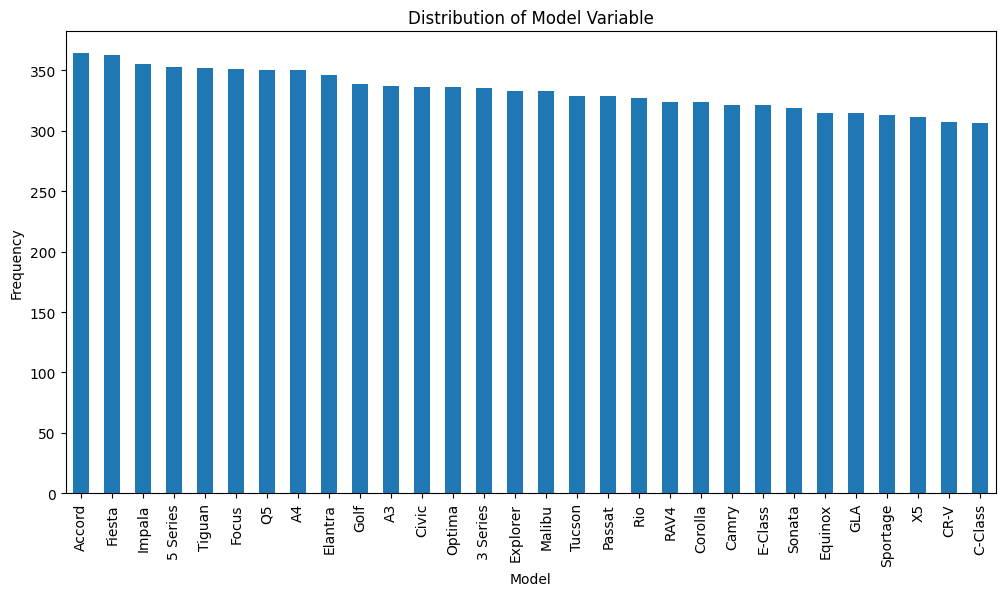

In [40]:
# Analyze the distribution of the 'Model' column
plt.figure(figsize=(12,6))
df["Model"].value_counts().plot(kind="bar")
plt.xlabel("Model")
plt.ylabel("Frequency")
plt.title("Distribution of Model Variable")
plt.xticks(rotation=90)
plt.show()

In [41]:
# One-hot encode the 'Model' column
df = pd.get_dummies(df, columns=['Model'], prefix='Model')

In [42]:
df.head()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Age,Mileage_per_Age,Price_per_Engine_Size,Price_per_Age,...,Model_Optima,Model_Passat,Model_Q5,Model_RAV4,Model_Rio,Model_Sonata,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5
0,2020,4.2,289944,3,4.0,8501,5,57988.800000,2024.047619,1700.200000,...,0,0,0,0,1,0,0,0,0,0
1,2012,2.0,5356,2,2.0,12092,13,412.000000,6046.000000,930.153846,...,0,0,0,0,0,0,0,0,0,0
2,2020,4.2,231440,4,1.0,11171,5,46288.000000,2659.761905,2234.200000,...,0,0,0,0,0,0,0,0,0,0
3,2023,2.0,160971,2,0.0,11780,2,80485.500000,5890.000000,5890.000000,...,0,0,1,0,0,0,0,0,0,0
4,2003,2.6,286618,3,2.0,2867,22,13028.090909,1102.692308,130.318182,...,0,0,0,0,0,0,0,0,0,0


### Data Standardization
Standardizing numerical features ensures that they are on the same scale, which is important for many machine learning algorithms.

In [43]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler

In [44]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [45]:
num_cols_X = ['Year', 'Engine_Size', 'Mileage', "Mileage_per_Age", "Price_per_Engine_Size", "Price_per_Age","Age"]

In [46]:
df[num_cols_X] = scaler_X.fit_transform(df[num_cols_X])

In [47]:
df['Price'] = scaler_y.fit_transform(df[['Price']])

In [48]:
df.head()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Age,Mileage_per_Age,Price_per_Engine_Size,Price_per_Age,...,Model_Optima,Model_Passat,Model_Q5,Model_RAV4,Model_Rio,Model_Sonata,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5
0,1.227264,1.044831,1.629870,3,4.0,-0.111570,-1.227264,1.908005,-0.770863,0.337526,...,0,0,0,0,1,0,0,0,0,0
1,0.067029,-0.870038,-1.668616,2,2.0,1.044871,-0.067029,-0.811480,1.558467,-0.199749,...,0,0,0,0,0,0,0,0,0,0
2,1.227264,1.044831,0.951786,4,1.0,0.748274,-1.227264,1.355349,-0.402686,0.710107,...,0,0,0,0,0,0,0,0,0,0
3,1.662353,-0.870038,0.135023,2,0.0,0.944395,-1.662353,2.970576,1.468119,3.260824,...,0,0,1,0,0,0,0,0,0,0
4,-1.238235,-0.347801,1.591321,3,2.0,-1.925936,1.238235,-0.215593,-1.304470,-0.757808,...,0,0,0,0,0,0,0,0,0,0


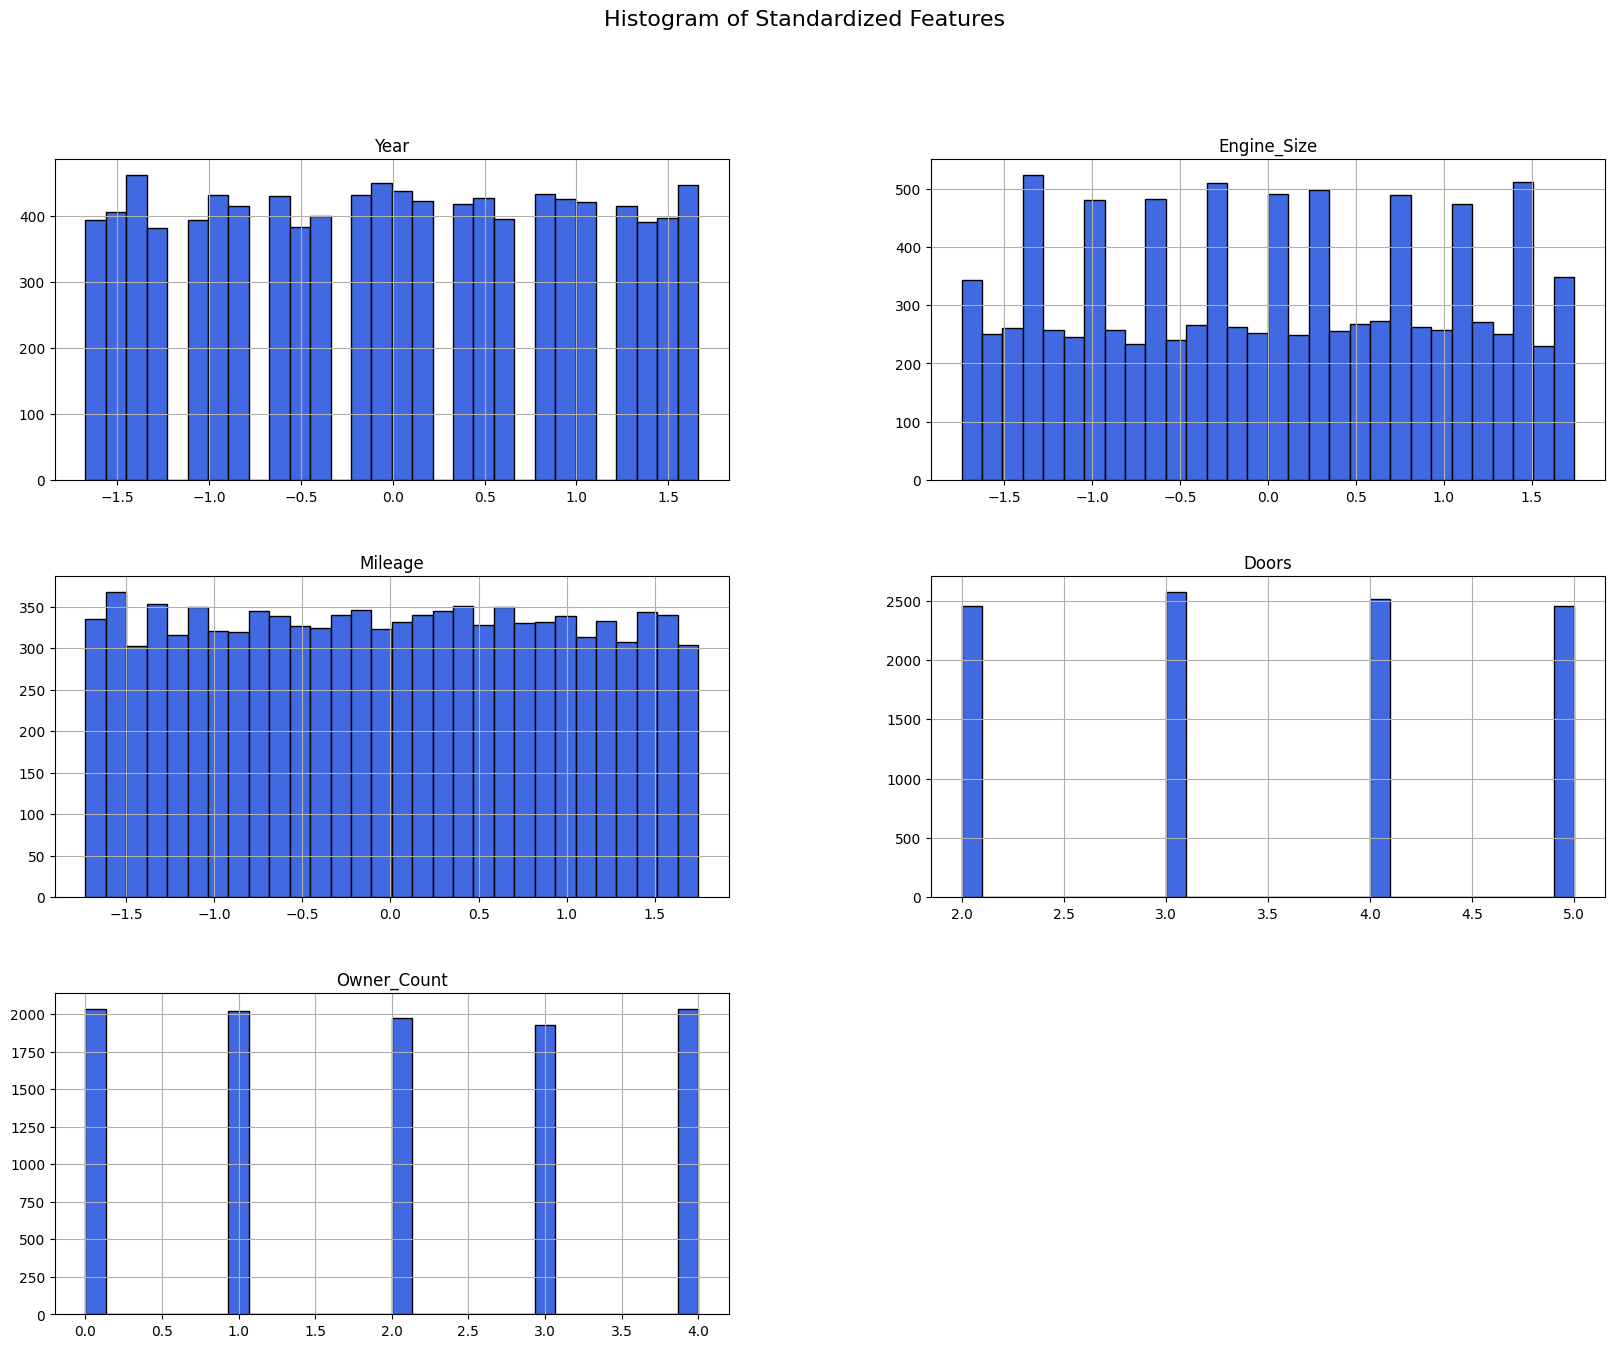

In [49]:
# Visualize the standardized features
df[num_cols].hist(bins=30, figsize=(20, 15), color="royalblue", edgecolor="black")

plt.suptitle("Histogram of Standardized Features", fontsize=16)
plt.show()

## Machine Learning Modeling

In this section, we will build and evaluate machine learning models to predict car prices. We will start with a simple Linear Regression model and then explore more advanced techniques like Ridge Regression, Lasso Regression, and ElasticNet. We will also perform feature selection and cross-validation to improve model performance.

### Splitting the Data into Training and Testing Sets
Before training the model, we need to split the dataset into training and testing sets. This allows us to evaluate the model's performance on unseen data.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [51]:
# Define features (X) and target variable (y)
X = df.drop(columns=["Price"])
y = df["Price"]

In [52]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression Model
We start with a simple Linear Regression model to establish a baseline performance.

In [53]:
# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

In [55]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [56]:
print(f"MAE: {mae:.4f}")
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

MAE: 0.0074
MSE: 0.0009
RMSE: 0.0305
R²: 0.9990


### Cross-Validation for Linear Regression
Cross-validation helps us assess the model's performance more robustly by evaluating it on multiple subsets of the data.

In [57]:
from sklearn.model_selection import cross_val_score


# Perform 5-fold cross-validation
cv_scores = cross_val_score(lr, X, y, cv = 5, scoring="r2")

In [58]:
print(f'Cross-validation R² scores: {cv_scores}')
print(f'Mean CV R²: {cv_scores.mean():.4f}')

Cross-validation R² scores: [0.99951133 0.99904242 0.9996229  0.99883553 0.99920734]
Mean CV R²: 0.9992


### Ridge Regression with Hyperparameter Tuning
Ridge Regression is a regularized version of Linear Regression that helps prevent overfitting. We use GridSearchCV to find the best hyperparameter (`alpha`).

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [60]:
# Initialize Ridge Regression
ridge = Ridge()
# Define hyperparameter grid
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [61]:
# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(ridge, param_grid=params, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [62]:
print(f'Best Alpha(Ridge): {grid_search.best_params_}')
print(f'Best R² Score(Ridge): {grid_search.best_score_:.4f}')

Best Alpha(Ridge): {'alpha': 0.1}
Best R² Score(Ridge): 0.9993


### Lasso Regression with Hyperparameter Tuning
Lasso Regression is another regularized regression method that performs feature selection by shrinking some coefficients to zero. We use GridSearchCV to find the best `alpha`.

In [63]:
from sklearn.linear_model import Lasso

In [64]:
# Initialize Lasso Regression
lasso = Lasso()
# Define hyperparameter grid
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [65]:
# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(lasso, param_grid=params, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [66]:
print(f'Best Alpha (Lasso): {grid_search.best_params_}')
print(f'Best R² Score (Lasso): {grid_search.best_score_:.4f}')

Best Alpha (Lasso): {'alpha': 0.001}
Best R² Score (Lasso): 0.9993


### Feature Importance with Lasso
Lasso Regression can help identify the most important features by shrinking less important features coefficients to zero.

In [67]:
# Train Lasso with the best alpha
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [68]:
# Extract and plot feature coefficients
coefficients = pd.Series(lasso.coef_, index=X_train.columns)

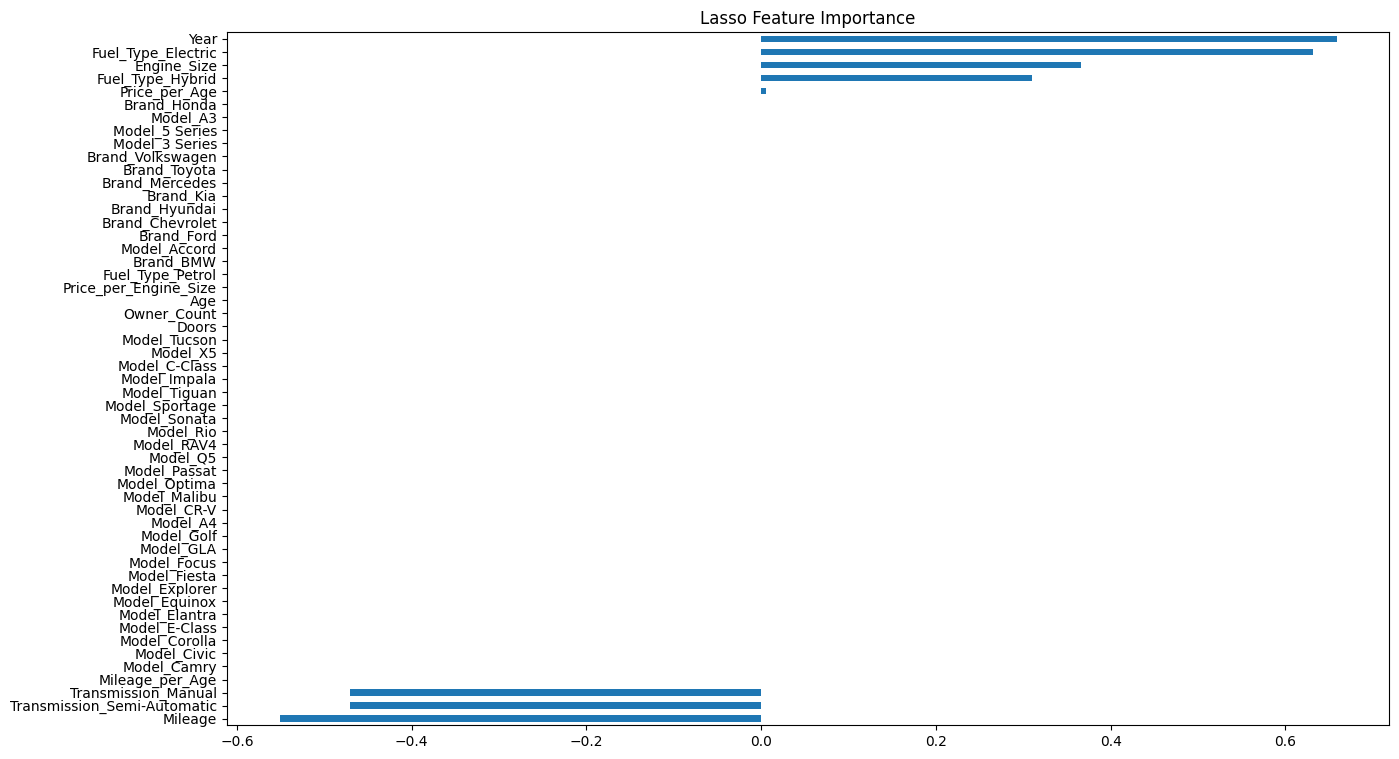

In [69]:
plt.figure(figsize=(15, 9))
coefficients.sort_values().plot(kind="barh")
plt.title("Lasso Feature Importance")
plt.show()

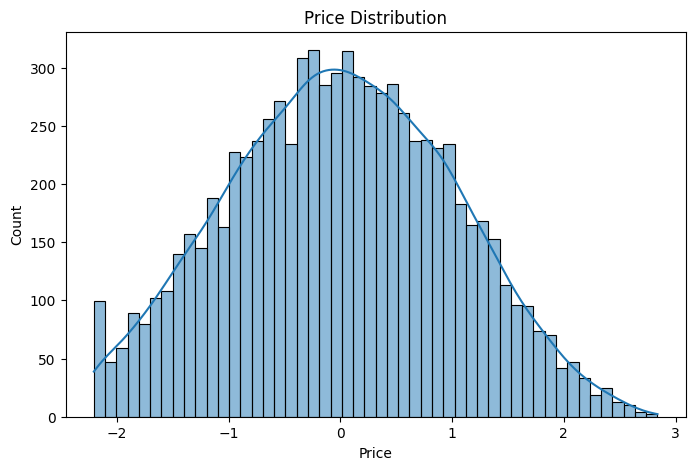

In [70]:
plt.figure(figsize=(8, 5))
sns.histplot(y_train, bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

In [71]:
selected_features = ["Mileage", "Year", "Engine_Size"]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [72]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_selected, y_train)

Ridge(alpha=0.1)

In [73]:
print(f"Ridge R² Score: {ridge.score(X_test_selected, y_test)}")

Ridge R² Score: 0.8726433302056269


### Feature Selection with Recursive Feature Elimination (RFE)
RFE is a technique to select the most important features by recursively removing the least significant ones.

In [74]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

In [75]:
# Initialize Ridge Regression
ridge = Ridge(alpha=0.1)
# Perform RFE to select the top 6 features
rfe = RFE(estimator=ridge, n_features_to_select=6)
rfe.fit(X_train, y_train)

RFE(estimator=Ridge(alpha=0.1), n_features_to_select=6)

In [76]:
# Get selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Best Features:", selected_features)

Selected Best Features: Index(['Year', 'Engine_Size', 'Mileage', 'Fuel_Type_Electric',
       'Transmission_Manual', 'Transmission_Semi-Automatic'],
      dtype='object')


### Model Evaluation with Selected Features
We train a Ridge Regression model using the selected features and evaluate its performance.

In [77]:
# Train Ridge Regression with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

ridge.fit(X_train_selected, y_train)

Ridge(alpha=0.1)

In [78]:
# Evaluate the model
r2_score = ridge.score(X_test_selected, y_test)
print(f"New Ridge Model R² Score: {r2_score}")

New Ridge Model R² Score: 0.9820535269356674


In [79]:
# Evaluate the model
selected_features = ['Year', 'Engine_Size', 'Mileage', 'Fuel_Type_Electric', 'Transmission_Manual']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_selected, y_train)

Ridge(alpha=0.1)

In [80]:
r2_score = ridge.score(X_test_selected, y_test)
print(f"New Ridge Model R² Score: {r2_score}")

New Ridge Model R² Score: 0.9446879162964346


### SHAP Values for Model Interpretability
SHAP (SHapley Additive exPlanations) helps us understand the contribution of each feature to the model's predictions.

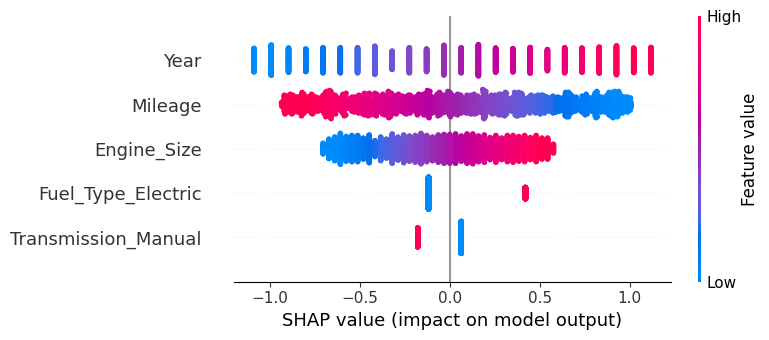

In [81]:
import shap

# Initialize SHAP explainer
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_selected, y_train)

explainer = shap.Explainer(ridge, X_train_selected)
shap_values = explainer(X_test_selected)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test_selected)

In [82]:
selected_features = ['Year', 'Engine_Size', 'Mileage']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_selected, y_train)
r2_score = ridge.score(X_test_selected, y_test)
print(f"New Ridge Model R² Score: {r2_score}")

New Ridge Model R² Score: 0.8726433302056269


In [83]:
selected_features = ['Year', 'Engine_Size', 'Mileage', 'Fuel_Type_Electric']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_selected, y_train)
r2_score = ridge.score(X_test_selected, y_test)
print(f"New Ridge Model R² Score: {r2_score}")

New Ridge Model R² Score: 0.9309758199015747


In [84]:
selected_features = ['Year', 'Engine_Size', 'Mileage', 'Transmission_Manual']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_selected, y_train)
r2_score = ridge.score(X_test_selected, y_test)
print(f"New Ridge Model R² Score: {r2_score}")

New Ridge Model R² Score: 0.8876155164666011


In [85]:
selected_features = ['Year', 'Engine_Size', 'Mileage', 'Fuel_Type_Electric', 'Transmission_Manual']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_selected, y_train)
r2_score = ridge.score(X_test_selected, y_test)
print(f"New Ridge Model R² Score: {r2_score}")

New Ridge Model R² Score: 0.9446879162964346


In [86]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train_selected, y_train)

Ridge(alpha=0.01)

In [87]:
train_r2 = ridge.score(X_train_selected, y_train)
test_r2 = ridge.score(X_test_selected, y_test)

In [88]:
print(f"Train R² Score: {train_r2}")
print(f"Test R² Score: {test_r2}")

Train R² Score: 0.9441739998552428
Test R² Score: 0.9446880170612592


In [89]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(ridge, X_train_selected, y_train, cv=5, scoring='r2')

In [90]:
print(f"Cross Validation R² Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

Cross Validation R² Scores: [0.94358794 0.94210491 0.94364223 0.94753325 0.94325406]
Mean CV Score: 0.9440244752345324


### ElasticNet Regression
ElasticNet combines the benefits of Ridge and Lasso Regression. We train and evaluate an ElasticNet model.

In [91]:
from sklearn.linear_model import ElasticNet

# Initialize ElasticNet
elastic = ElasticNet(alpha=0.01, l1_ratio=0.1)
elastic.fit(X_train_selected, y_train)

ElasticNet(alpha=0.01, l1_ratio=0.1)

In [92]:
# Evaluate the model
train_r2_elastic = elastic.score(X_train_selected, y_train)
test_r2_elastic = elastic.score(X_test_selected, y_test)

In [93]:
print(f"ElasticNet Train R² Score: {train_r2_elastic}")
print(f"ElasticNet Test R² Score: {test_r2_elastic}")

ElasticNet Train R² Score: 0.9438682825783928
ElasticNet Test R² Score: 0.9442854954011946


### Visualizing Model Predictions
We visualize the actual vs. predicted values and the distribution of residual errors to assess the model's performance.

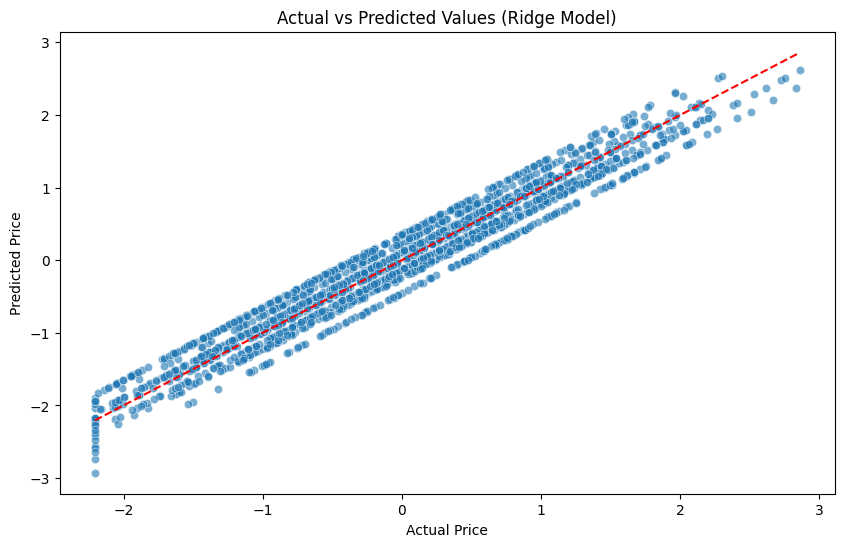

In [94]:
# Plot actual vs. predicted values
y_pred = ridge.predict(X_test_selected)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Ideal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Values (Ridge Model)")
plt.show()

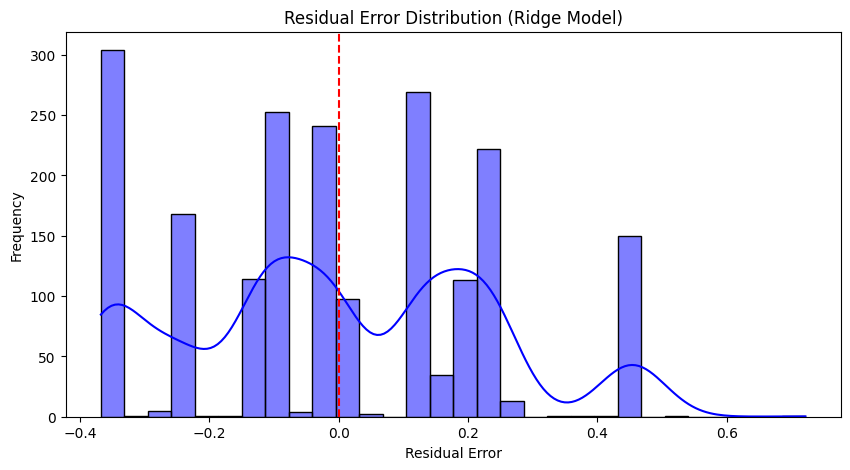

In [95]:
# Plot residual error distribution
errors = y_test - y_pred

plt.figure(figsize=(10, 5))
sns.histplot(errors, bins=30, kde=True, color="blue")
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.title("Residual Error Distribution (Ridge Model)")
plt.show()

In [97]:
# Inverse transform the scaled target variable to its original scale
y_train_original = scaler_y.inverse_transform(y_train.to_numpy().reshape(-1, 1))
y_test_original = scaler_y.inverse_transform(y_test.to_numpy().reshape(-1, 1))
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

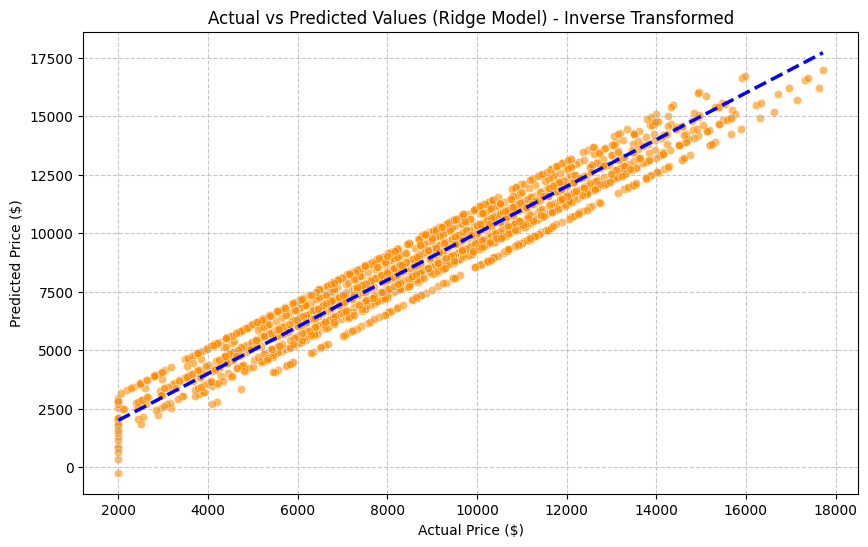

In [104]:
# Plot actual vs. predicted values in the original scale
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_original.flatten(), y=y_pred_original.flatten(), alpha=0.6, color="darkorange")
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 
         '--', color='blue', linewidth=2.5)
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs Predicted Values (Ridge Model) - Inverse Transformed")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

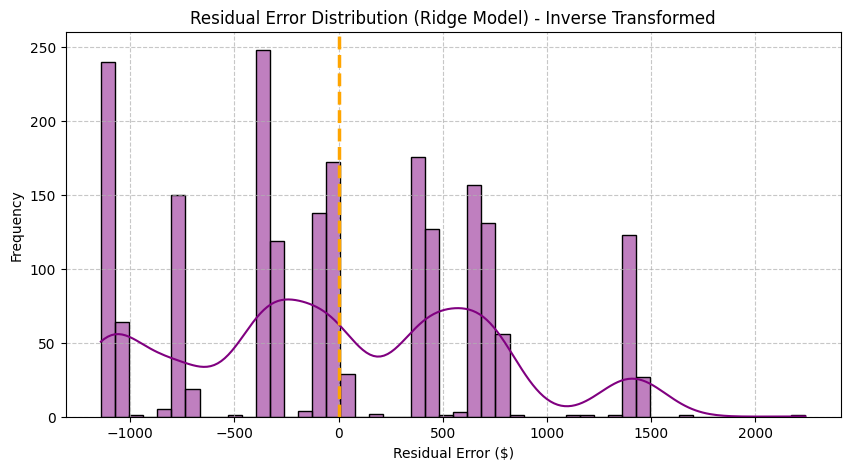

In [102]:
# Calculate and plot residual errors in the original scale
errors_original = y_test_original.flatten() - y_pred_original.flatten()

plt.figure(figsize=(10, 5))
sns.histplot(errors_original, bins=50, kde=True, color="purple")
plt.axvline(0, color='orange', linestyle='--', linewidth=2.5)
plt.xlabel("Residual Error ($)")
plt.ylabel("Frequency")
plt.title("Residual Error Distribution (Ridge Model) - Inverse Transformed")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Data Loading and Initial Exploration
The dataset was loaded using `pandas`, followed by an initial exploration to understand its structure. It contains **10,000** entries with key features such as `Brand`, `Model`, `Year`, `Engine_Size`, `Mileage`, and `Price`. Preliminary checks revealed **no missing values**, and all data types were appropriate for further processing.

### Data Cleaning and Preprocessing
- **Missing Values**: No missing values were detected in the dataset.
- **Outlier Detection**: The `Price` column contained outliers, which were identified using the **Interquartile Range (IQR) method** and removed to enhance model stability.
- **Categorical Variables**: Categorical features such as `Fuel_Type` and `Transmission` were **one-hot encoded** to convert them into a machine-learning-compatible format.

### Exploratory Data Analysis (EDA)
- **Feature Distributions**: Histograms were plotted to analyze the distribution of numerical features like `Year`, `Engine_Size`, and `Mileage`.
- **Correlation Analysis**: A heatmap of the correlation matrix was used to explore relationships between numerical variables. Notably, `Year` and `Price` exhibited a strong positive correlation.
- **Visualizations**: Scatter plots were generated to examine the relationship between `Mileage` and `Price`, while pair plots provided an overview of feature interactions.

### Feature Engineering
To enhance model performance, new features were engineered:
- **Age**: Computed as `2025 - Year`, representing the car’s age.
- **Mileage_per_Age**: Defined as `Mileage / Age`, indicating the average mileage per year.

These additional features provided valuable insights and improved model accuracy.

### Data Standardization
Numerical features were standardized using `StandardScaler` to ensure uniform scaling. Standardization was particularly crucial for models like **Ridge and Lasso Regression**, which are sensitive to feature magnitudes.

## Model Evaluation and Results

### Challenges Faced
1. **Feature Selection**: Selecting the most relevant features was a key challenge. Techniques like **Recursive Feature Elimination (RFE)** and **Lasso Regression** were employed to identify the most impactful features.
2. **Outlier Impact**: The presence of outliers in the target variable (`Price`) initially degraded model performance. This issue was mitigated by removing extreme values using the **IQR method**.
3. **Hyperparameter Tuning**: Optimal hyperparameters for **Ridge and Lasso Regression** were identified through **GridSearchCV**, which systematically explored different values of `alpha`.
4. **Model Interpretability**: To gain insights into feature importance, **SHAP values** were utilized, providing a better understanding of the model’s decision-making process.

### Best Model Performance
Following rigorous feature selection, hyperparameter tuning, and regularization, the **Ridge Regression** model achieved the highest performance, with an **R² score of 94.47%**. The best-performing model utilized the following selected features:
- **Year**
- **Engine_Size**
- **Mileage**
- **Fuel_Type_Electric**
- **Transmission_Manual**

The model demonstrated **minimal overfitting**, with cross-validation results yielding a mean **R² score of 94.40%**, confirming its robustness.

### Visualizing Results
1. **Actual vs. Predicted Prices**: A scatter plot comparing actual and predicted prices showed a strong linear relationship, with most data points aligning closely along the ideal **blue dashed line**.
2. **Residual Error Distribution**: A histogram of residual errors was centered around **zero**, with a roughly symmetric shape, suggesting that the model’s predictions were unbiased and errors were normally distributed.

### Conclusion
The **Ridge Regression** model successfully predicted car prices with an **R² score of 94.47%**, demonstrating high accuracy and reliability. By leveraging:
- **Feature selection**
- **Hyperparameter tuning**
- **Outlier handling**
- **Effective standardization**

we developed a robust and interpretable model. The visual analyses further validated its performance, making it well-suited for real-world **car price prediction applications**.
